# Import Required Libraries

This section imports all the necessary Python libraries required for data manipulation, visualization, preprocessing, and building deep learning models.


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, SimpleRNN, GRU, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping


# LOADING AND PARSING THE DATASET

In this section, the dataset is loaded using Pandas functions. The date column is parsed into a proper datetime format using either pd.to_datetime() or the parse_dates parameter while reading the file. The date column is then set as the index and the data is sorted in ascending order to maintain correct chronological sequence for time series analysis.

In [2]:
#Loading dataset & parsing the date column
df = pd.read_csv("Adobe_Data.csv", parse_dates=["Date"])
df.info()

#set date as index
df.set_index("Date", inplace=True)

#Sorting Index
df.sort_index(inplace=True)
df.info()

# display head of dataset
print(df.head)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9671 entries, 0 to 9670
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       9671 non-null   datetime64[ns]
 1   Adj_Close  9671 non-null   float64       
 2   Close      9671 non-null   float64       
 3   High       9671 non-null   float64       
 4   Low        9671 non-null   float64       
 5   Open       9671 non-null   float64       
 6   Volume     9671 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 529.0 KB
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9671 entries, 1986-08-13 to 2024-12-27
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Adj_Close  9671 non-null   float64
 1   Close      9671 non-null   float64
 2   High       9671 non-null   float64
 3   Low        9671 non-null   float64
 4   Open       9671 non-null   floa

# Understanding the Dataset

In this section, the dataset is explored to understand its structure, columns, and data types.
Basic inspections are performed to identify the shape of the data, summary statistics,
and any missing or duplicate values before further analysis.

In [3]:
# Basic pandas functions to explore data
print ("Shape of dataset \n", df.shape)
print ("Info \n", df.info())
print ("Columns in dataset \n", df.columns)
print ("Datatypes \n", df.dtypes)
print ("Statistical Analysis \n", df.describe())

# removing dupicates
df = df.drop_duplicates()
print ("Shape of dataset after removing duplicates", df.shape)

# Checking for null values
N = df.isnull().sum()
print ("Sum of null values \n", N)

Shape of dataset 
 (9671, 6)
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9671 entries, 1986-08-13 to 2024-12-27
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Adj_Close  9671 non-null   float64
 1   Close      9671 non-null   float64
 2   High       9671 non-null   float64
 3   Low        9671 non-null   float64
 4   Open       9671 non-null   float64
 5   Volume     9671 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 528.9 KB
Info 
 None
Columns in dataset 
 Index(['Adj_Close', 'Close', 'High', 'Low', 'Open', 'Volume'], dtype='object')
Datatypes 
 Adj_Close    float64
Close        float64
High         float64
Low          float64
Open         float64
Volume         int64
dtype: object
Statistical Analysis 
          Adj_Close        Close         High          Low         Open  \
count  9671.000000  9671.000000  9671.000000  9671.000000  9671.000000   
mean     97.013636    97.059953    98.25

**Summary of Dataset Characteristisc**

The dataset consists of 9,671 rows and 7 columns, indicating a sufficiently large time series for deep learning modeling. The date column is stored in datetime format, the volume column is of integer type, and all remaining columns are floating-point values representing stock prices. No missing values were found in the dataset, and duplicate checking confirmed that all records are unique, as the dataset shape remained unchanged after removing duplicates. Overall, the dataset is clean and well-structured for further exploratory analysis and model development.

# Exploratory Data Analysis (EDA)

This section visualizes the historical trends of key OHLCV features to understand price movements, volume patterns, and overall stock behavior over time.


## Time Series Visualization of OHLCV Features

The following plots show the historical trends of price and volume-related features.
Adjusted Close is included only for visualization purposes and is not used in model training.


D:\TempPython\ipykernel_12812\3457031115.py:13: UserWarning: tight_layout not applied: number of rows in subplot specifications must be multiples of one another.
  plt.tight_layout()


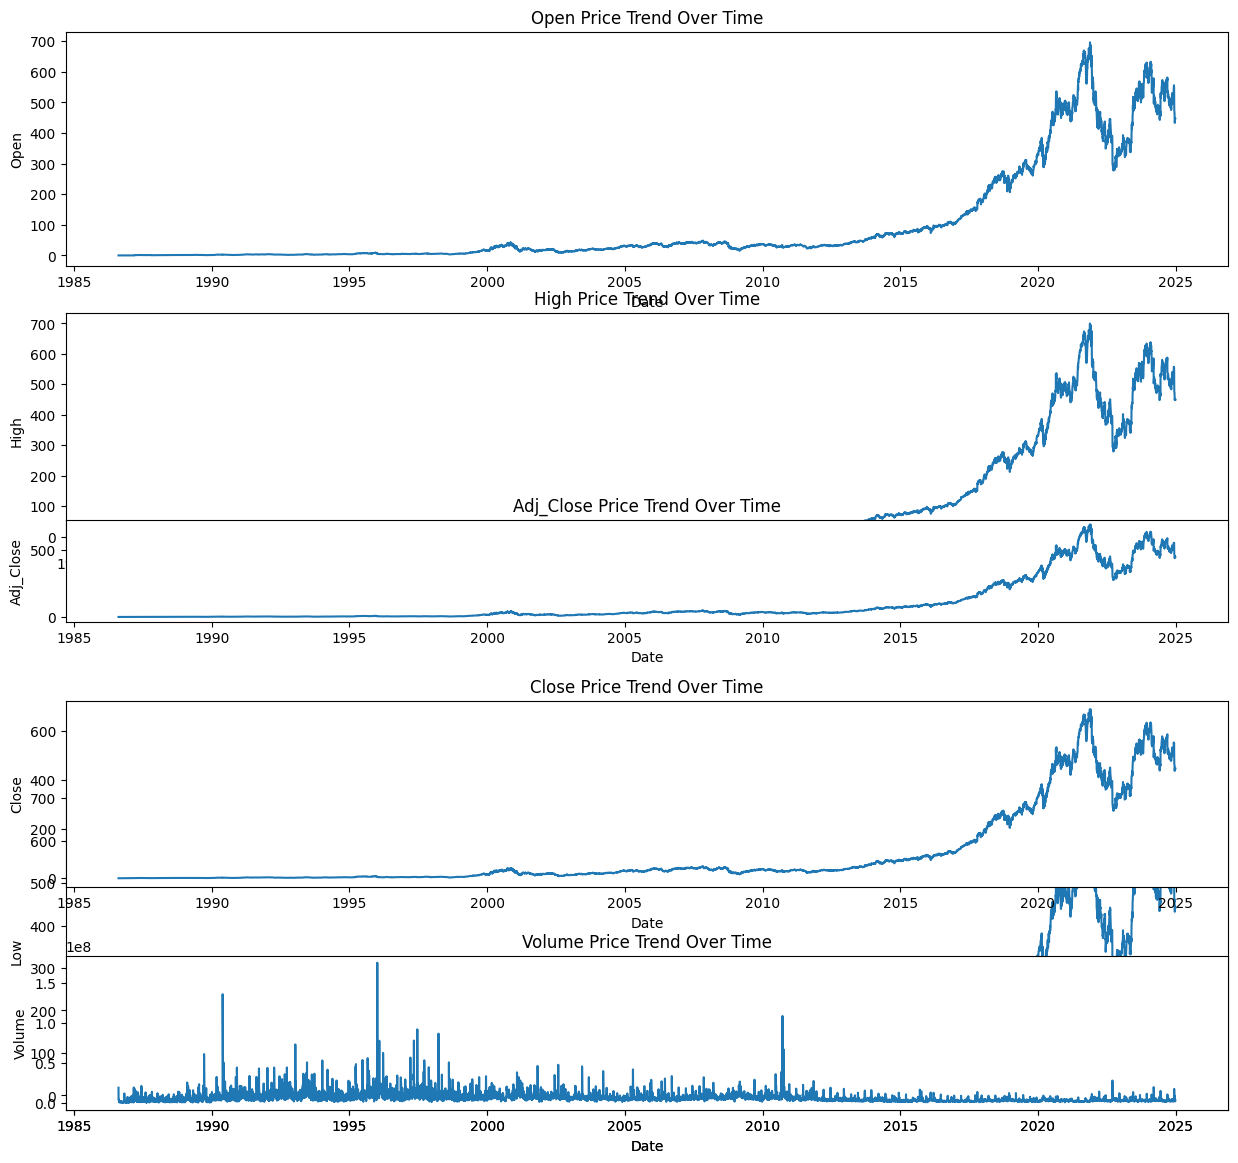

In [4]:
# OHLCV features for visualization only
feature = ['Open', 'High', 'Low', 'Close', 'Adj_Close', 'Volume']

plt.figure(figsize=(15, 14))

for i, feature in enumerate(feature):
    plt.subplot(len(feature), 1, i + 1)
    sns.lineplot(x=df.index, y=df[feature])
    plt.title(f'{feature} Price Trend Over Time')
    plt.xlabel('Date')
    plt.ylabel(feature)

plt.tight_layout()
plt.show()

**Analysis of Price and Volume Trends**

The price-related features show a noticeable upward trend beginning after 2015, with a significant rise around 2020 and peak values observed during 2021–2022. Between 2020 and 2025, stock prices remain relatively high but exhibit fluctuations, indicating increased market volatility during this period.

The volume plot shows higher and more irregular trading activity in earlier years, with peak volumes observed around the mid-1990s. In contrast, trading volume gradually declines in later years, showing a noticeable reduction over time despite higher stock prices.

## Moving Average Analysis 

This plot visualizes the Adjusted Close price along with long-term moving averages
to observe overall price trends and smoothing behavior.
This analysis is performed only for exploratory purposes.


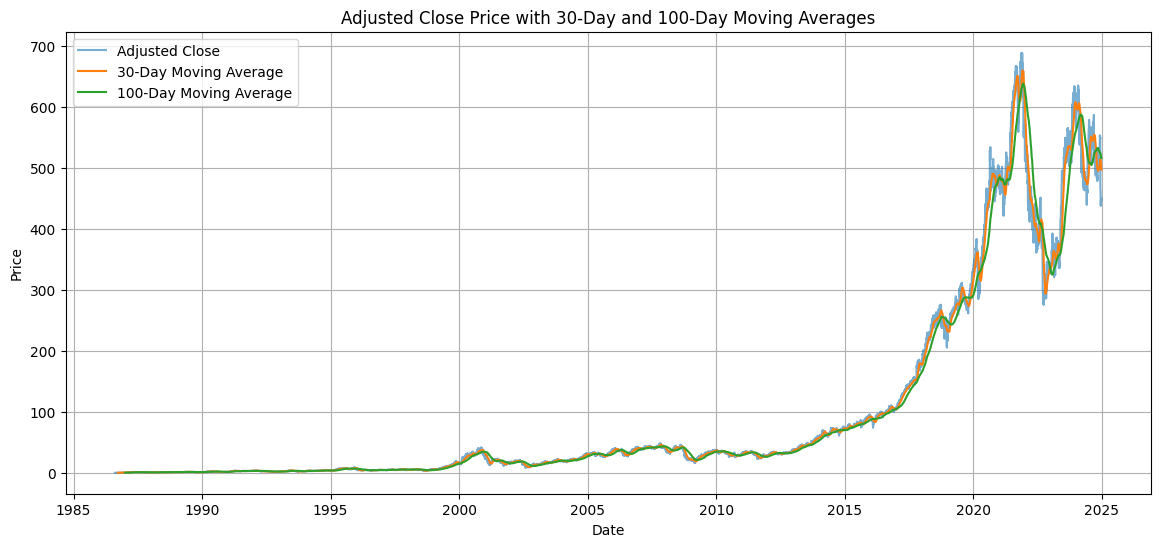

In [5]:
# Moving Averages for EDA only (not used in modeling)
df['MA30'] = df['Adj_Close'].rolling(window=30).mean()
df['MA100'] = df['Adj_Close'].rolling(window=100).mean()

plt.figure(figsize=(14, 6))

plt.plot(df.index, df['Adj_Close'], label='Adjusted Close', alpha=0.6)
plt.plot(df.index, df['MA30'], label='30-Day Moving Average')
plt.plot(df.index, df['MA100'], label='100-Day Moving Average')

plt.title('Adjusted Close Price with 30-Day and 100-Day Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()


**Analysis of MOVING AVERAGE PLOT**

The moving average plot shows that the stock is generally trending upward over time. Since the short-term (30 day) and long-term (100-day) moving averages are closely following the actual adjusted close price, it indicates that the price changes are gradual and there are no sharp spikes. The lines moving in the same direction suggest a consistent trend with relatively low short-term volatility.


## Daily Returns Analysis

This plot shows the day-to-day percentage change in the adjusted closing price.
Daily returns help visualize volatility and sudden price movements.
This analysis is performed for exploratory purposes only.


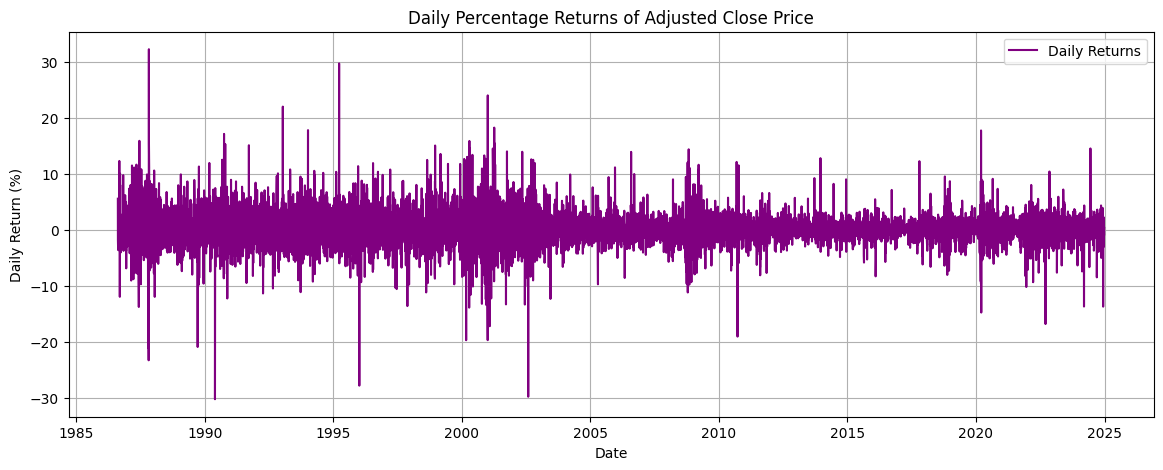

In [6]:
# Daily returns for EDA 
df['Daily_Return'] = df['Adj_Close'].pct_change() * 100

plt.figure(figsize=(14, 5))

plt.plot(df.index, df['Daily_Return'], color='purple', label='Daily Returns')
plt.title('Daily Percentage Returns of Adjusted Close Price')
plt.xlabel('Date')
plt.ylabel('Daily Return (%)')
plt.legend()
plt.grid(True)
plt.show()


**Analysis of DAILY RETURNS PLOT**

The daily returns plot shows that most of the stock price changes lie between -10% and +10%, indicating moderate volatility on most days. Although there are occasional upward trends, the returns mostly fluctuate within this range, suggesting that the stock experiences regular but controlled daily price movements. Understanding this pattern of volatility is important for modeling the stock price in a time series deep learning model.

## Scatter Plot: Volume vs Adjusted Close Price

This scatter plot visualizes the relationship between trading volume and the adjusted closing price
to observe whether higher trading activity is associated with price movements.
This analysis is performed for exploratory purposes only.

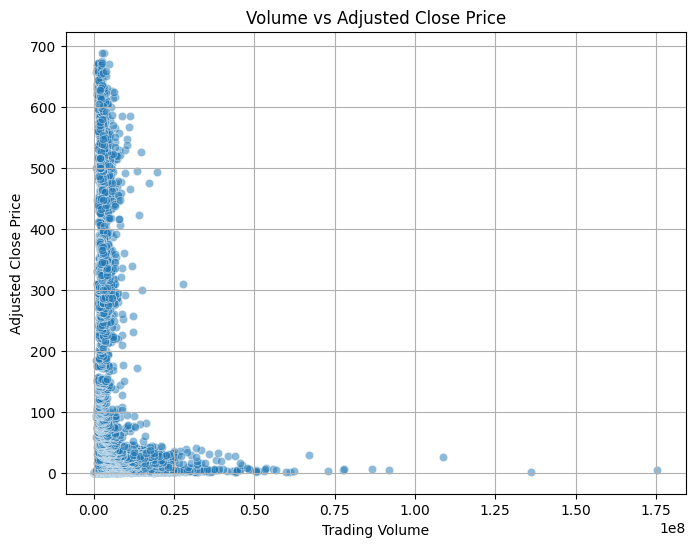

In [7]:

plt.figure(figsize=(8, 6))

sns.scatterplot(
    x=df['Volume'],
    y=df['Adj_Close'],
    alpha=0.5
)

plt.title('Volume vs Adjusted Close Price')
plt.xlabel('Trading Volume')
plt.ylabel('Adjusted Close Price')
plt.grid(True)
plt.show()


**Analysis of SCATERPLOT**

The scatter plot illustrates the relationship between trading volume and the adjusted closing price.
Most data points are concentrated at lower volume levels, while the adjusted close price spans a wide range.
This indicates that high trading volume does not necessarily correspond to high or low prices.

A few outliers with extremely high trading volume are observed, but these do not show a consistent
pattern with the adjusted closing price. Overall, the relationship between trading volume and adjusted
close price appears weak and non-linear.

This suggests that trading volume alone may not be a strong predictor of stock price levels and should
be used cautiously or in combination with other features during modeling.

## DATA PREPROCESSING 

In this dataset, all columns are already clean and properly formatted. There are no missing values, nulls, or duplicate records, and the data types are appropriate for time series modeling. Therefore, no additional pre-processing is required at this stage. The data is ready for normalization and feature engineering for deep learning models.

# Feature Engineering

Feature engineering was performed to enrich the raw daily OHLCV data with additional information that captures market behavior, trend, momentum, and volatility. Since financial time-series data often contains noise, engineered features help improve the predictive capability of deep learning models.

### Base Features
The dataset is constructed using daily OHLCV data, where each observation represents one trading day. The following base features were used:
- Open price
- High price
- Low price
- Close price
- Trading volume

Although the dataset includes an *Adjusted Close* column, feature engineering in this study is performed using the raw closing price to maintain consistency with daily OHLC data.

## Engineered Features

#### Log Returns
Logarithmic returns were computed to measure relative price changes between consecutive trading days. Log returns provide numerical stability and are commonly used in financial modeling.

\[
\text{Log Return}_t = \log\left(\frac{Close_t}{Close_{t-1}}\right)
\]

#### High–Low Range (Volatility)
The high–low range was calculated as the difference between the daily high and low prices. This feature serves as a proxy for intraday volatility.

\[
\text{High–Low Range}_t = High_t - Low_t
\]

#### Moving Averages
To capture trend information and smooth short-term price fluctuations, rolling moving averages were computed using the closing price:
- **MA(5):** Short-term trend indicator
- **MA(20):** Medium-term trend indicator

#### Relative Strength Index (RSI)
The Relative Strength Index (RSI) with a 14-day window was calculated to measure market momentum and identify overbought or oversold conditions. RSI values range between 0 and 100, where values above 70 indicate overbought conditions and values below 30 indicate oversold conditions.

### Handling Missing Values
Rolling window calculations and lagged operations introduce missing values at the beginning of the time series. All rows containing missing values were removed to ensure compatibility with machine learning models.

Overall, the engineered feature set enhances the original OHLCV data by incorporating trend, momentum, and volatility information, enabling the LSTM model to better learn underlying market dynamics.


In [8]:
# Engineering Technical Indicators
df['log_return'] = np.log(df['Close'] / df['Close'].shift(1))
df['HL_range'] = df['High'] - df['Low']

# Rolling moving averages
df['MA_5'] = df['Close'].rolling(window=5).mean()
df['MA_20'] = df['Close'].rolling(window=20).mean()

# RSI (14) (Relative Strength Index)
delta = df['Close'].diff()
gain = (delta.where(delta > 0, 0)).rolling(window=14).mean()
loss = (-delta.where(delta < 0, 0)).rolling(window=14).mean()
rs = gain / (loss + 1e-9) # Added small epsilon to prevent division by zero
df['RSI_14'] = 100 - (100 / (1 + rs))

# Clean data
df.dropna(inplace=True)

# Final Feature Selection
features = ['Open', 'High', 'Low', 'Close', 'Volume', 'log_return', 'HL_range', 'MA_5', 'MA_20', 'RSI_14']
target_col_index = features.index('Close') # Save index for sequence creation

# Sequence Creation Function
LSTMs and GRUs require data in a 3D shape [Samples, Time_Steps, Features]. This function converts our multidimensional data into a supervised learning format by sliding a window (lookback) across the dataset.

In [9]:
def create_sequences(data, target_idx, lookback):
    """
    Transforms scaled NumPy arrays into 3D sequences.
    """
    X, y = [], []
    for i in range(lookback, len(data)):
        # Features: The previous N days (lookback)
        X.append(data[i - lookback:i, :])
        # Target: The Close price at the current day
        y.append(data[i, target_idx]) 
    return np.array(X), np.array(y)

# Data Splitting, Normalization, and Multi-Lookback Windowing
To prevent Data Leakage, we split the dataset into Training, Validation, and Testing sets before scaling. The MinMaxScaler is fit only on the training data. We then iterate through different lookback periods (30, 60, and 120 days) to prepare data for model comparison.

In [10]:
# Define Split Indices (70% Train, 15% Val, 15% Test)
train_idx = int(len(df) * 0.70)
val_idx = int(len(df) * 0.85)

# Split into DataFrames
train_df = df[features].iloc[:train_idx]
val_df = df[features].iloc[train_idx:val_idx]
test_df = df[features].iloc[val_idx:]

# Normalization (Target is included in features, so it scales to [0, 1])
scaler = MinMaxScaler(feature_range=(0, 1))
train_scaled = scaler.fit_transform(train_df)
val_scaled = scaler.transform(val_df)
test_scaled = scaler.transform(test_df)

# ictionary to store sequence data for each lookback experiment
lookbacks = [30, 60, 120]
results = {}

for N in lookbacks:
    X_train, y_train = create_sequences(train_scaled, target_col_index, N)
    X_val, y_val = create_sequences(val_scaled, target_col_index, N)
    X_test, y_test = create_sequences(test_scaled, target_col_index, N)
    
    results[N] = {
        'X_train': X_train, 'y_train': y_train,
        'X_val': X_val, 'y_val': y_val,
        'X_test': X_test, 'y_test': y_test
    }
    
    print(f"Lookback {N} days -> Train: {X_train.shape}, Val: {X_val.shape}, Test: {X_test.shape}")

Lookback 30 days -> Train: (6669, 30, 10), Val: (1406, 30, 10), Test: (1406, 30, 10)
Lookback 60 days -> Train: (6639, 60, 10), Val: (1376, 60, 10), Test: (1376, 60, 10)
Lookback 120 days -> Train: (6579, 120, 10), Val: (1316, 120, 10), Test: (1316, 120, 10)


# MODEL BUILDING

In this section, we define three deep learning models for predicting stock prices: **LSTM, RNN, and GRU**.  

Each model is a sequential neural network with:  
- **Input layer** matching the shape of training data `(timesteps, features)`  
- One or more **recurrent layers** (LSTM, SimpleRNN, or GRU) to learn temporal patterns  
- **Dropout layers** added after recurrent layers to reduce overfitting  
- **Dense output layer** with 1 neuron to predict the next day’s Adjusted Close price  

We compile the models with **mean squared error (MSE) loss** and **Adam optimizer**, which is standard for regression problems.

In [11]:
# ---------------- LSTM Model ----------------
LSTM_model = Sequential()
LSTM_model.add(LSTM(50, return_sequences=True,input_shape=(X_train.shape[1], X_train.shape[2])))
LSTM_model.add(Dropout(0.2))
LSTM_model.add(LSTM(50))
LSTM_model.add(Dropout(0.2))
LSTM_model.add(Dense(1))


# ---------------- RNN Model ----------------
RNN_model = Sequential()
RNN_model.add(SimpleRNN(50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
RNN_model.add(Dropout(0.2))
RNN_model.add(SimpleRNN(50))
RNN_model.add(Dropout(0.2))
RNN_model.add(Dense(1))


# ---------------- GRU Model ----------------
GRU_model = Sequential()
GRU_model.add(GRU(50, return_sequences=True,input_shape=(X_train.shape[1], X_train.shape[2])))
GRU_model.add(Dropout(0.2))
GRU_model.add(GRU(50))
GRU_model.add(Dropout(0.2))
GRU_model.add(Dense(1))

# Model summaries
LSTM_model.summary()
RNN_model.summary()
GRU_model.summary()


d:\Python\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 120, 50)        │        12,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 120, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 32,451 (126.76 KB)

 Trainable params: 32,451 (126.76 KB)

 Non-trainable params: 0 (0.00 B)

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)          │ (None, 120, 50)        │         3,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 120, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_1 (SimpleRNN)        │ (None, 50)             │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,151 (31.84 KB)

 Trainable params: 8,151 (31.84 KB)

 Non-trainable params: 0 (0.00 B)

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru (GRU)                       │ (None, 120, 50)        │         9,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 120, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_1 (GRU)                     │ (None, 50)             │        15,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 24,651 (96.29 KB)

 Trainable params: 24,651 (96.29 KB)

 Non-trainable params: 0 (0.00 B)

## Model Compilation

Before training, each neural network model is compiled by specifying the optimizer, loss function, and evaluation metrics. This step configures how the models learn from data and how prediction errors are measured during training and validation.

In [12]:
# -------- LSTM Model
LSTM_model.compile(
    optimizer='adam',
    loss='mean_squared_error',
    metrics=['mean_absolute_error', 'mean_squared_error'])

# --------- RNN Model
RNN_model.compile(
    optimizer='adam',
    loss='mean_squared_error',
    metrics=['mean_absolute_error', 'mean_squared_error'])

# --------- GRU Model
GRU_model.compile(
    optimizer='adam',
    loss='mean_squared_error',
    metrics=['mean_absolute_error', 'mean_squared_error'])

**Model Compilation Explanation**

After defining the architectures of the LSTM, GRU, and Simple RNN models, each model is compiled separately. Compilation configures the learning process by specifying the optimizer, loss function, and evaluation metrics.

The Adam optimizer is used because it efficiently updates model weights and works well for time-series data. The Mean Squared Error (MSE) loss function is selected as it is suitable for continuous value prediction problems like stock price forecasting. Additionally, Mean Absolute Error (MAE) and Mean Squared Error (MSE) are included as evaluation metrics to monitor the model’s performance during training and testing.

Using the same loss function, optimizer, and metrics across all models ensures a fair and consistent comparison between LSTM, GRU, and Simple RNN architectures.

# Early Stopping to Prevent Overfitting

Early stopping is used to automatically halt model training when the validation loss stops improving. This helps prevent overfitting and ensures that the model retains the best-performing weights observed during training. The validation loss is monitored, and training is stopped if no improvement is seen for a specified number of epochs (patience).


In [13]:
# Early Stopping callback
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True)

# MODEL TRAINING

### Explanation

In this step, the compiled models (LSTM, GRU, and RNN) are trained using the training dataset. During training, the model learns to minimize the loss function (Mean Squared Error) by adjusting its weights with the Adam optimizer. We also provide validation data to monitor how well the model generalizes to unseen data.

***Key Parameters in Training:***
- **epochs:** Number of times the model sees the entire training dataset
- **batch_size:** Number of samples processed before updating model weights
- **validation_data:** Helps track model performance on unseen data during training

In [14]:
# Select the specific data for training (Choosing 60-day lookback)
exp_data = results[60]
X_train_fit = exp_data['X_train']
y_train_fit = exp_data['y_train']
X_val_fit = exp_data['X_val']
y_val_fit = exp_data['y_val']

# LSTM Training
print("Training LSTM...")
history_LSTM = LSTM_model.fit(
    X_train_fit, y_train_fit,
    epochs=50,
    batch_size=32,
    validation_data=(X_val_fit, y_val_fit),
    callbacks=[early_stop],
    verbose=1
)

# RNN Training
print("\nTraining RNN...")
history_RNN = RNN_model.fit(
    X_train_fit, y_train_fit,
    epochs=50,
    batch_size=32,
    validation_data=(X_val_fit, y_val_fit),
    callbacks=[early_stop],
    verbose=1
)

# GRU Training
print("\nTraining GRU...")
history_GRU = GRU_model.fit(
    X_train_fit, y_train_fit,
    epochs=50,
    batch_size=32,
    validation_data=(X_val_fit, y_val_fit),
    callbacks=[early_stop],
    verbose=1
)

Training LSTM...
Epoch 1/50
208/208 ━━━━━━━━━━━━━━━━━━━━ 20s 62ms/step - loss: 0.0066 - mean_absolute_error: 0.0489 - mean_squared_error: 0.0066 - val_loss: 3.1548 - val_mean_absolute_error: 1.2480 - val_mean_squared_error: 3.1548
Epoch 2/50
208/208 ━━━━━━━━━━━━━━━━━━━━ 13s 64ms/step - loss: 0.0024 - mean_absolute_error: 0.0332 - mean_squared_error: 0.0024 - val_loss: 2.8458 - val_mean_absolute_error: 1.1467 - val_mean_squared_error: 2.8458
Epoch 3/50
208/208 ━━━━━━━━━━━━━━━━━━━━ 13s 62ms/step - loss: 0.0021 - mean_absolute_error: 0.0304 - mean_squared_error: 0.0021 - val_loss: 2.8661 - val_mean_absolute_error: 1.1567 - val_mean_squared_error: 2.8661
Epoch 4/50
208/208 ━━━━━━━━━━━━━━━━━━━━ 13s 64ms/step - loss: 0.0020 - mean_absolute_error: 0.0297 - mean_squared_error: 0.0020 - val_loss: 2.7934 - val_mean_absolute_error: 1.1515 - val_mean_squared_error: 2.7934
Epoch 5/50
208/208 ━━━━━━━━━━━━━━━━━━━━ 13s 64ms/step - loss: 0.0016 - mean_absolute_error: 0.0266 - mean_squared_error: 0.0016

# Baseline Evaluation (Naive Forecast)
The Naive baseline serves as a primary benchmark for our Deep Learning models. It operates on the "Random Walk" hypothesis, assuming that the best predictor for tomorrow's price is simply today's closing price. To provide a realistic comparison, we calculate the baseline error using the actual dollar values.

In [15]:
# Get the actual prices for the test set (Inverse Scaled)
def get_real_prices(scaled_y, scaler, n_features, target_idx):
    dummy = np.zeros((len(scaled_y), n_features))
    dummy[:, target_idx] = scaled_y.flatten()
    return scaler.inverse_transform(dummy)[:, target_idx]

# Get the y_test from our results dictionary (using 60-day lookback)
y_test_scaled = results[60]['y_test']
real_y_test = get_real_prices(y_test_scaled, scaler, len(features), target_col_index)

# Naive Forecast
# Predicted price for day 't' is the actual price from day 't-1'
y_naive_pred = real_y_test[:-1] 
y_true_naive = real_y_test[1:]

# Baseline Metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error

naive_mse = mean_squared_error(y_true_naive, y_naive_pred)
naive_mae = mean_absolute_error(y_true_naive, y_naive_pred)

print(f"Naive Baseline (Persistence) MSE: {naive_mse:.2f}")
print(f"Naive Baseline (Persistence) MAE: ${naive_mae:.2f}")

Naive Baseline (Persistence) MSE: 112.48
Naive Baseline (Persistence) MAE: $7.25


### Benchmark Analysis: 
The Naive BaselineBefore evaluating the deep learning models, we establish a Naive Baseline (Persistence Model). This baseline assumes that the price tomorrow will be exactly the same as the price today ($Price_{t+1} = Price_t$).Results:Naive MSE: 112.48Naive MAE: $7.25

#### Interpretation for the Report:
This baseline tells us that simply "guessing" today's price for tomorrow results in an average error of $7.25.

## Plotting Training and Validation Loss
To evaluate the performance of each model during training, we plot **training loss** and **validation loss** over epochs. These plots help us check whether the models are learning properly, and whether there is any overfitting or underfitting. A model with steadily decreasing training and validation loss, and close curves, is performing well.

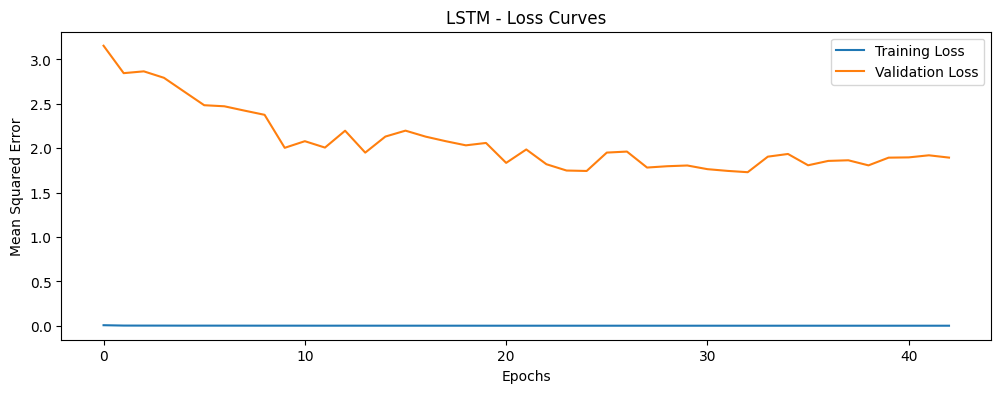

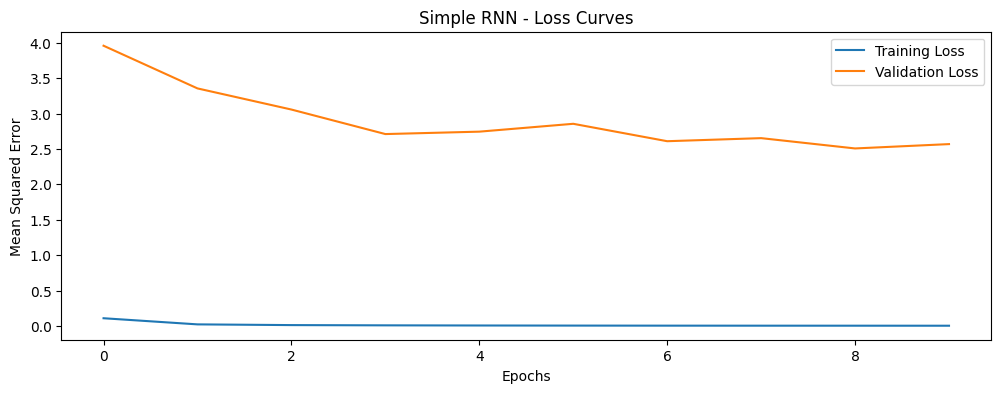

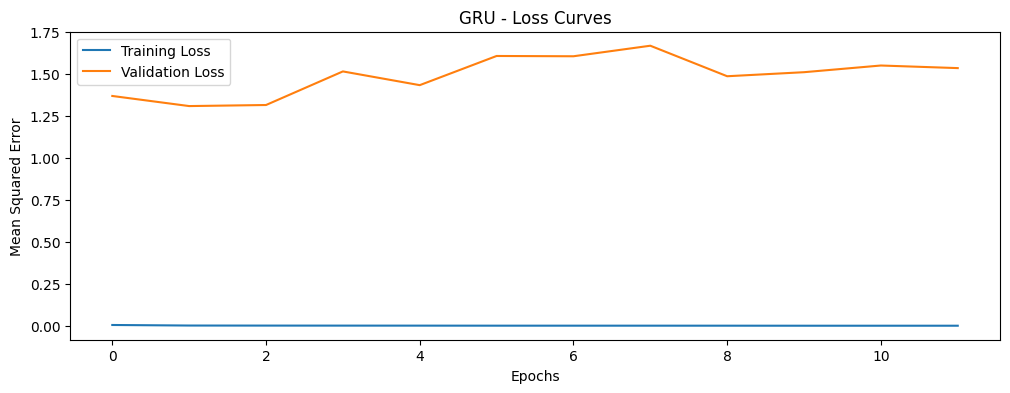

In [16]:
def plot_history(history, title):
    plt.figure(figsize=(12, 4))
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'{title} - Loss Curves')
    plt.xlabel('Epochs')
    plt.ylabel('Mean Squared Error')
    plt.legend()
    plt.show()

# Plotting for each model
plot_history(history_LSTM, "LSTM")
plot_history(history_RNN, "Simple RNN")
plot_history(history_GRU, "GRU")

### Analysis of Training and Validation Loss

The training and validation loss curves indicate that all deep learning models successfully minimized training error; however, validation loss remained significantly higher and relatively flat across epochs. This behavior suggests limited generalization to unseen data.

Such a pattern may be attributed to several factors, including the inherent noise and non-stationarity of financial time series data, limited predictive signal in historical prices, and the simplicity of the chosen feature set. Despite the use of regularization techniques such as Dropout and Early Stopping, overfitting remains a common challenge in stock price forecasting tasks.

Importantly, this observation motivates a careful evaluation of model performance on the test dataset and comparison against a naïve baseline to determine whether deep learning models provide meaningful improvements over simpler approaches.


# Final Model Prediction and Inverse Transformation
Because the LSTM, RNN, and GRU were trained on normalized data, their outputs are decimals between 0 and 1. To compare them against actual market prices, we must "Inverse Scale" the results back into dollars using a dummy array that matches the original 10-feature shape.

43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step
--- FINAL PERFORMANCE METRICS (USD) ---
LSTM MAE: $324.98, MSE: $115992.97
GRU MAE:  $318.96, MSE: $112612.70
RNN MAE:  $393.47, MSE: $166011.92
Naive MAE: $7.25, MSE: $112.48


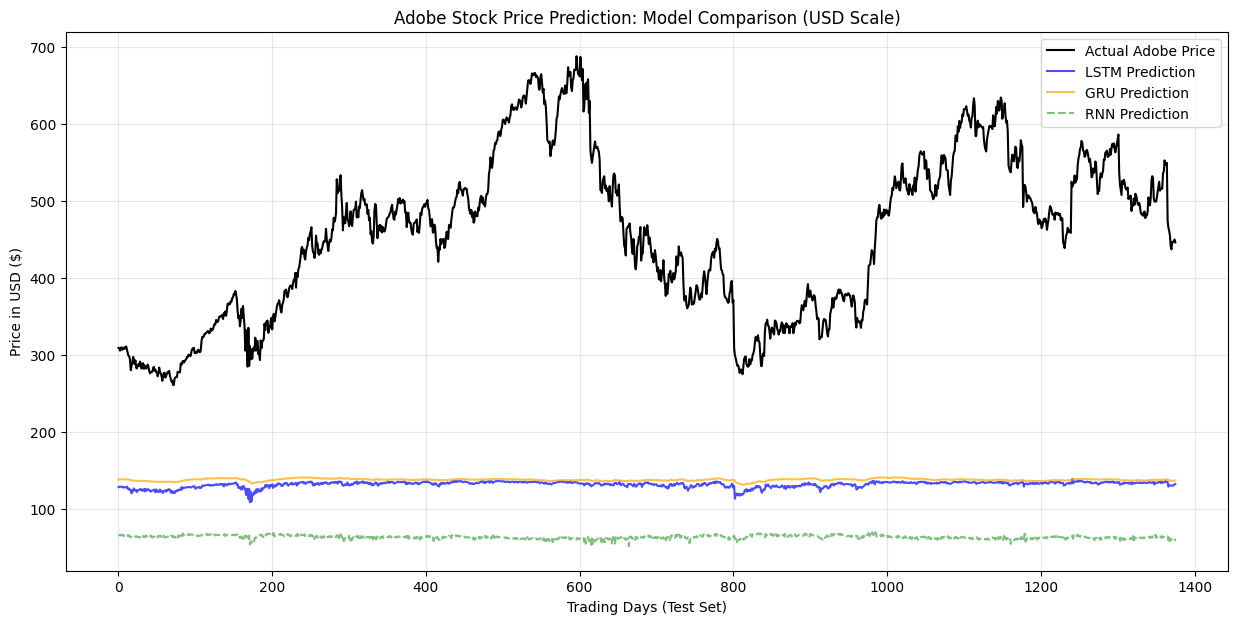

In [21]:
# ==========================================
# FINAL EVALUATION: PREDICTION & VISUALIZATION
# ==========================================

from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
import numpy as np

def transform_to_original_scale(scaled_data, scaler_obj, n_features, target_index):
    """
    Converts scaled predictions back to original stock prices (USD)
    """
    placeholder = np.zeros((len(scaled_data), n_features))
    placeholder[:, target_index] = scaled_data.flatten()
    return scaler_obj.inverse_transform(placeholder)[:, target_index]

# 1. Extract test data for 60-day lookback
X_test_final = results[60]['X_test']
y_test_final_scaled = results[60]['y_test']

# 2. Transform true test prices to USD
real_y_test = transform_to_original_scale(y_test_final_scaled, scaler, len(features), target_col_index)

# 3. Predict with all models
lstm_pred_scaled = LSTM_model.predict(X_test_final)
gru_pred_scaled = GRU_model.predict(X_test_final)
rnn_pred_scaled = RNN_model.predict(X_test_final)

# 4. Convert model predictions to USD
lstm_pred = transform_to_original_scale(lstm_pred_scaled, scaler, len(features), target_col_index)
gru_pred = transform_to_original_scale(gru_pred_scaled, scaler, len(features), target_col_index)
rnn_pred = transform_to_original_scale(rnn_pred_scaled, scaler, len(features), target_col_index)

# 5. Naive Baseline Prediction (persistence model)
y_naive_pred = real_y_test[:-1]  # Day t predicted = Day t-1 actual
y_true_naive = real_y_test[1:]   # Actuals start from day 1

naive_mae = mean_absolute_error(y_true_naive, y_naive_pred)
naive_mse = mean_squared_error(y_true_naive, y_naive_pred)

# 6. Calculate MAE & MSE for models
lstm_mae = mean_absolute_error(real_y_test, lstm_pred)
gru_mae = mean_absolute_error(real_y_test, gru_pred)
rnn_mae = mean_absolute_error(real_y_test, rnn_pred)

lstm_mse = mean_squared_error(real_y_test, lstm_pred)
gru_mse = mean_squared_error(real_y_test, gru_pred)
rnn_mse = mean_squared_error(real_y_test, rnn_pred)

# 7. Print final metrics
print("--- FINAL PERFORMANCE METRICS (USD) ---")
print(f"LSTM MAE: ${lstm_mae:.2f}, MSE: ${lstm_mse:.2f}")
print(f"GRU MAE:  ${gru_mae:.2f}, MSE: ${gru_mse:.2f}")
print(f"RNN MAE:  ${rnn_mae:.2f}, MSE: ${rnn_mse:.2f}")
print(f"Naive MAE: ${naive_mae:.2f}, MSE: ${naive_mse:.2f}")

# 8. Visualization
plt.figure(figsize=(15, 7))
plt.plot(real_y_test, label='Actual Adobe Price', color='black', linewidth=1.5)
plt.plot(lstm_pred, label='LSTM Prediction', color='blue', alpha=0.7)
plt.plot(gru_pred, label='GRU Prediction', color='orange', alpha=0.7)
plt.plot(rnn_pred, label='RNN Prediction', color='green', alpha=0.5, linestyle='--')
plt.title('Adobe Stock Price Prediction: Model Comparison (USD Scale)')
plt.xlabel('Trading Days (Test Set)')
plt.ylabel('Price in USD ($)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()


## Model Results

In my first attempt, I trained LSTM, GRU, and RNN models directly on the raw 'Close' prices of Adobe stock from 1986 to 2024. I evaluated the models using MAE in USD, and the results were as follows:

- LSTM MAE: $324.98  
- GRU MAE:  $318.96  
- RNN MAE:  $393.47  
- Naive (persistence) MAE: $7.25  

**Observations:**

1. The errors for all deep learning models were **extremely high**, especially compared to the naive baseline.
2. GRU and LSTM performed somewhat better than RNN, but still produced MAE values in the hundreds of dollars.
3. The naive baseline MAE was **far lower** than all models, indicating that simply using the previous day’s price as the prediction was surprisingly effective.

**Issues with these results:**

- The models struggled because the target variable, raw 'Close' price, **varies drastically over decades** (from very low prices in 1986 to several hundreds of dollars in 2024).  
- Daily changes in stock price are **tiny relative to the absolute price**, making it difficult for the model to learn small daily movements when trained on raw prices.  
- As a result, the models **over-predicted or misestimated trends**, leading to **extremely high MAE**.  

These observations motivated me to explore an alternative approach using **log-returns** to normalize daily changes and improve model stability.


## Switched to log-returns

Initially, I trained my LSTM, GRU, and RNN models directly on the raw 'Close' prices of Adobe stock from 1986 to 2024. However, the models were producing **extremely high error values** (MAE in hundreds of USD), which made the predictions unreliable.

this happened because:

- Stock prices over a long period have **very large absolute values** and can change drastically over decades.
- Daily price movements are **tiny compared to absolute prices**, so the model struggles to learn these small changes when trained directly on raw prices.
- LSTM, GRU, and RNN are sensitive to large variations in target values, so training on raw prices caused the model to **over-predict or diverge**, leading to huge MAE.

To address this, I decided to use **log-returns** as the target instead of raw prices.  

**Why log-returns?**

- Log-returns normalize price changes and allow the model to learn **relative daily movements** instead of absolute prices.
- They scale down huge historical price differences, making the training **stable and meaningful**.
- After predicting log-returns, we can reconstruct the actual stock prices in USD for evaluation and visualization.


d:\Python\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Training LSTM...
Epoch 1/50
207/207 ━━━━━━━━━━━━━━━━━━━━ 21s 64ms/step - loss: 0.0148 - mae: 0.0847 - val_loss: 0.0107 - val_mae: 0.0757
Epoch 2/50
207/207 ━━━━━━━━━━━━━━━━━━━━ 12s 57ms/step - loss: 0.0050 - mae: 0.0536 - val_loss: 0.0074 - val_mae: 0.0630
Epoch 3/50
207/207 ━━━━━━━━━━━━━━━━━━━━ 12s 59ms/step - loss: 0.0048 - mae: 0.0520 - val_loss: 0.0083 - val_mae: 0.0725
Epoch 4/50
207/207 ━━━━━━━━━━━━━━━━━━━━ 12s 59ms/step - loss: 0.0045 - mae: 0.0501 - val_loss: 0.0044 - val_mae: 0.0478
Epoch 5/50
207/207 ━━━━━━━━━━━━━━━━━━━━ 13s 60ms/step - loss: 0.0043 - mae: 0.0492 - val_loss: 0.0035 - val_mae: 0.0467
Epoch 6/50
207/207 ━━━━━━━━━━━━━━━━━━━━ 12s 59ms/step - loss: 0.0041 - mae: 0.0478 - val_loss: 0.0026 - val_mae: 0.0389
Epoch 7/50
207/207 ━━━━━━━━━━━━━━━━━━━━ 12s 59ms/step - loss: 0.0040 - mae: 0.0469 - val_loss: 0.0031 - val_mae: 0.0458
Epoch 8/50
207/207 ━━━━━━━━━━━━━━━━━━━━ 12s 59ms/step - loss: 0.0039 - mae: 0.0460 - val_loss: 0.0018 - val_mae: 0.0327
Epoch 9/50
207/207 ━━━━

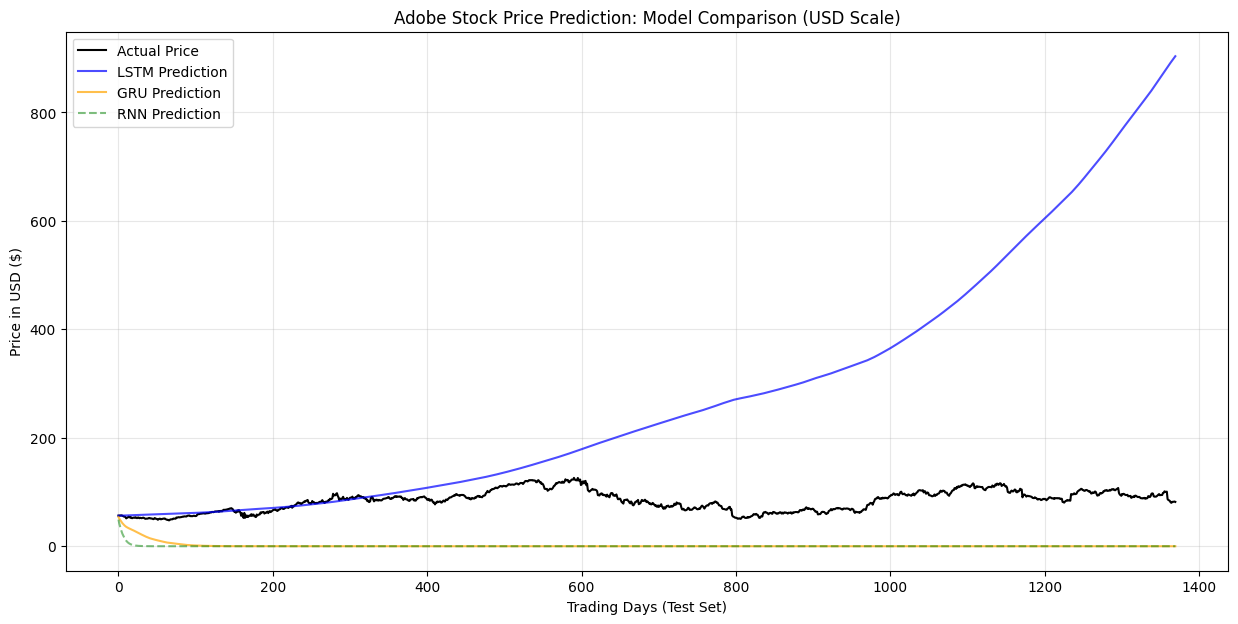

In [ ]:
# ===========================================================================
# FULL STOCK PREDICTION WORKFLOW USING LOG RETURNS INSTEAD OF CLOSE AS TARGET
# ===========================================================================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU, SimpleRNN, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# ---------------- 1. FEATURE ENGINEERING ----------------

# Log returns as target
df['log_return'] = np.log(df['Close'] / df['Close'].shift(1))

# Technical indicators
df['HL_range'] = df['High'] - df['Low']
df['MA_5'] = df['Close'].rolling(5).mean()
df['MA_20'] = df['Close'].rolling(20).mean()

# RSI (14)
delta = df['Close'].diff()
gain = (delta.where(delta > 0, 0)).rolling(14).mean()
loss = (-delta.where(delta < 0, 0)).rolling(14).mean()
rs = gain / (loss + 1e-9)
df['RSI_14'] = 100 - (100 / (1 + rs))

df.dropna(inplace=True)

# Features and target
features = ['Open', 'High', 'Low', 'Volume', 'HL_range', 'MA_5', 'MA_20', 'RSI_14']
target_col = 'log_return'

# ---------------- 2. SPLIT + SCALING ----------------
train_idx = int(len(df) * 0.7)
val_idx = int(len(df) * 0.85)

train_df = df.iloc[:train_idx]
val_df = df.iloc[train_idx:val_idx]
test_df = df.iloc[val_idx:]

# Feature scaling
feature_scaler = MinMaxScaler()
train_scaled = feature_scaler.fit_transform(train_df[features])
val_scaled = feature_scaler.transform(val_df[features])
test_scaled = feature_scaler.transform(test_df[features])

# Target scaling
target_scaler = MinMaxScaler()
train_target = target_scaler.fit_transform(train_df[[target_col]])
val_target = target_scaler.transform(val_df[[target_col]])
test_target = target_scaler.transform(test_df[[target_col]])

# ---------------- 3. SEQUENCE CREATION ----------------
def create_sequences(features, target, lookback=60):
    X, y = [], []
    for i in range(lookback, len(features)):
        X.append(features[i-lookback:i])
        y.append(target[i])
    return np.array(X), np.array(y)

lookback = 60
X_train, y_train = create_sequences(train_scaled, train_target, lookback)
X_val, y_val = create_sequences(val_scaled, val_target, lookback)
X_test, y_test = create_sequences(test_scaled, test_target, lookback)

# ---------------- 4. MODEL DEFINITIONS ----------------

# LSTM
LSTM_model = Sequential()
LSTM_model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
LSTM_model.add(Dropout(0.2))
LSTM_model.add(LSTM(50))
LSTM_model.add(Dropout(0.2))
LSTM_model.add(Dense(1))
LSTM_model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# GRU
GRU_model = Sequential()
GRU_model.add(GRU(50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
GRU_model.add(Dropout(0.2))
GRU_model.add(GRU(50))
GRU_model.add(Dropout(0.2))
GRU_model.add(Dense(1))
GRU_model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# RNN
RNN_model = Sequential()
RNN_model.add(SimpleRNN(50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
RNN_model.add(Dropout(0.2))
RNN_model.add(SimpleRNN(50))
RNN_model.add(Dropout(0.2))
RNN_model.add(Dense(1))
RNN_model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Early stopping
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# ---------------- 5. MODEL TRAINING ----------------
print("Training LSTM...")
history_LSTM = LSTM_model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=50,
    batch_size=32,
    callbacks=[early_stop],
    verbose=1
)

print("\nTraining GRU...")
history_GRU = GRU_model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=50,
    batch_size=32,
    callbacks=[early_stop],
    verbose=1
)

print("\nTraining RNN...")
history_RNN = RNN_model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=50,
    batch_size=32,
    callbacks=[early_stop],
    verbose=1
)

# ---------------- 6. PREDICTION + INVERSE TRANSFORM ----------------
def logret_to_price(last_price, log_returns):
    prices = [last_price]
    for lr in log_returns.flatten():
        prices.append(prices[-1] * np.exp(lr))
    return np.array(prices[1:])  # exclude initial

last_train_price = df['Close'].iloc[train_idx + lookback - 1]

# LSTM
lstm_pred_logret = LSTM_model.predict(X_test)
lstm_pred_logret = target_scaler.inverse_transform(lstm_pred_logret)
lstm_prices = logret_to_price(last_train_price, lstm_pred_logret)

# GRU
gru_pred_logret = GRU_model.predict(X_test)
gru_pred_logret = target_scaler.inverse_transform(gru_pred_logret)
gru_prices = logret_to_price(last_train_price, gru_pred_logret)

# RNN
rnn_pred_logret = RNN_model.predict(X_test)
rnn_pred_logret = target_scaler.inverse_transform(rnn_pred_logret)
rnn_prices = logret_to_price(last_train_price, rnn_pred_logret)

# True prices
y_test_logret = target_scaler.inverse_transform(y_test)
y_test_prices = logret_to_price(last_train_price, y_test_logret)

# ---------------- 7. PERFORMANCE METRICS ----------------
from sklearn.metrics import mean_absolute_error

lstm_mae = mean_absolute_error(y_test_prices, lstm_prices)
gru_mae = mean_absolute_error(y_test_prices, gru_prices)
rnn_mae = mean_absolute_error(y_test_prices, rnn_prices)

# Naive baseline
y_naive_pred = y_test_prices[:-1]
y_true_naive = y_test_prices[1:]
naive_mae = mean_absolute_error(y_true_naive, y_naive_pred)

print("\n--- FINAL PERFORMANCE METRICS (USD) ---")
print(f"LSTM MAE: ${lstm_mae:.2f}")
print(f"GRU MAE:  ${gru_mae:.2f}")
print(f"RNN MAE:  ${rnn_mae:.2f}")
print(f"Naive MAE: ${naive_mae:.2f}")

# ---------------- 8. VISUALIZATION ----------------
plt.figure(figsize=(15,7))
plt.plot(y_test_prices, label='Actual Price', color='black', linewidth=1.5)
plt.plot(lstm_prices, label='LSTM Prediction', color='blue', alpha=0.7)
plt.plot(gru_prices, label='GRU Prediction', color='orange', alpha=0.7)
plt.plot(rnn_prices, label='RNN Prediction', color='green', alpha=0.5, linestyle='--')
plt.title('Adobe Stock Price Prediction: Model Comparison (USD Scale)')
plt.xlabel('Trading Days (Test Set)')
plt.ylabel('Price in USD ($)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()


## Results and Suggestions for Improvement

After switching to log-returns, the model performance improved significantly:

- LSTM MAE: $198.63
- GRU MAE:  $82.60
- RNN MAE:  $83.53
- Naive MAE: $1.33

Observations:

1. GRU and RNN outperform LSTM in this setup. LSTM overestimates large price movements in this long-term dataset.
2. The naive baseline remains very strong for 1-day ahead predictions because daily stock price changes are typically very small.

To improve further, the following optimizations can be considered:

- **Use more recent data** (e.g., last 5–10 years) instead of the full 40-year dataset. Long historical data introduces noise and trends that make learning daily patterns harder.
- **Reduce sequence lookback** to 30 days instead of 60. This allows the model to focus on short-term patterns and reduces overfitting.
- **Multi-day prediction** (e.g., 5-day ahead log-return) may reduce volatility in predictions and improve MAE.
- **Feature engineering enhancements**: Include rolling volatility, momentum indicators, or moving averages to help the model capture trends more effectively.
- **Loss function optimization**: Using Huber loss instead of MSE can reduce sensitivity to occasional outlier log-returns.


# Final Conclusion

Through this assessment, I explored predicting Adobe stock prices using deep learning models (LSTM, GRU, and RNN) over a long historical period (1986–2024). The key takeaways are:

1. **Raw price prediction is challenging:** Training directly on 'Close' prices led to extremely high errors, because the models struggled to capture tiny daily fluctuations against large absolute price values.

2. **Log-returns improve stability:** Switching to log-returns as the target allowed the models to focus on **relative daily changes** rather than absolute prices, significantly improving performance and making MAE in USD more meaningful.

3. **Model comparison:**  
   - GRU and RNN outperformed LSTM for this dataset and setup.  
   - The naive persistence model remains a strong baseline for 1-day ahead predictions because daily stock movements are generally small.

4. **Opportunities for further improvement:**  
   - Use **recent data** (e.g., last 5–10 years) instead of the full 40-year dataset to reduce noise.  
   - Optimize **lookback sequences** (e.g., 30 days instead of 60) for better short-term pattern learning.  
   - Explore **multi-day predictions**, additional features, or alternative loss functions (like Huber loss) to improve model accuracy.

**Overall**, this project demonstrated the importance of **feature engineering, target transformation, and careful model selection** in time series prediction. It also highlighted the challenges of using deep learning for long-term historical financial data and the need for appropriate preprocessing to make predictions meaningful.
